In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\SOULTZ_19932000Best_agreement_induced\SSFS1996 formatted csv.csv")

In [3]:
# 18/09/1996 12:37 start
# 1996-09-25 22:15:00 end
injSt = datetime(1996,9,18,12,37).timestamp()/86400
injEnd = datetime(1996,9,25,22,15).timestamp()/86400 - injSt
print(injEnd)

7.401388888889414


In [4]:
DT =[]
dt=[]
for i in range(len(catalog["Day"])):
    dayt = catalog["Day"][i].split("/")
    timt = catalog["Time"][i].split(":")
    DT.append(datetime(int(dayt[2]),int(dayt[1]),int(dayt[0]),int(timt[0]),int(timt[1]),int(timt[2])))
    dt.append(datetime(int(dayt[2]),int(dayt[1]),int(dayt[0]),int(timt[0]),int(timt[1]),int(timt[2])).timestamp()/86400.0-injSt)
print(len(DT))


3464


In [5]:
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['M.magnit'], catalog['East (m)'], catalog['North (m)'], catalog['Depth (m)'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dtF))

2859 2859


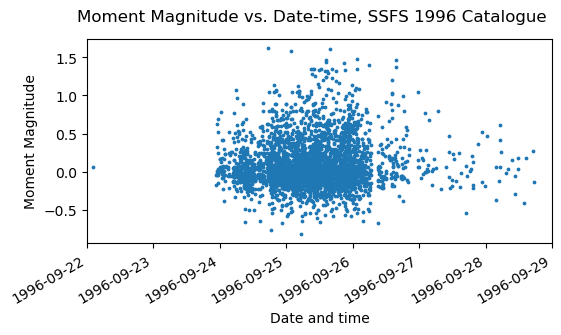

In [5]:
#Drif corrections
M0  = np.power(10,1.72*np.array(catalog['M.magnit'])+11.04)
MNew = 2/3.0*np.log10(M0)-6.1
#plt.scatter(DT,catalog["M.magnit"],s=3)
#plt.xlabel("Time")
#plt.ylabel("Mw")
#plt.show()
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(DT,MNew,s=3)
figure.suptitle("Moment Magnitude vs. Date-time, SSFS 1996 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(1996,9,22),datetime(1996,9,29)])
figure.autofmt_xdate()
plt.show()

In [6]:
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

136.5 -544.0 3357.0


In [7]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

In [8]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)

In [10]:
stDat= DT[0]
DTN = [(dt-stDat).total_seconds()/86400.0 for dt in DT]

MWN=[]
DTNew=[]
dstN=[]
# 3.8352662037037035
for i in range(len(DT)):
    if DTN[i] < 3.8352662037037035:
        MWN.append(MNew[i])
        DTNew.append(DTN[i])
        dstN.append(dist[i])

In [11]:
# create referential list to sort dist
dcN = dstN.copy()
dcNRef=[]
for i in range(len(dcN)):
    dcNRef.append(i)

2006-12-03 18:57:03


In [9]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [10]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


3464


1996-09-22 02:12:13 1996-09-28 17:30:45


In [11]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

2859


In [12]:
# Drif corrections
M0  = np.power(10,1.72*np.array(magF)+11.04)
MNew = 2/3.0*np.log10(M0)-6.1

In [13]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

DTNew = np.array(dtF)

for z in range(50,len(DTNew)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(DTNew[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(MNew[subDstRef[y]])
            rT.append(DTNew[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        if y>=45:
            pM.append(MNew[subDstRef[y]])
            pT.append(DTNew[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [14]:
print(len(percM))

280


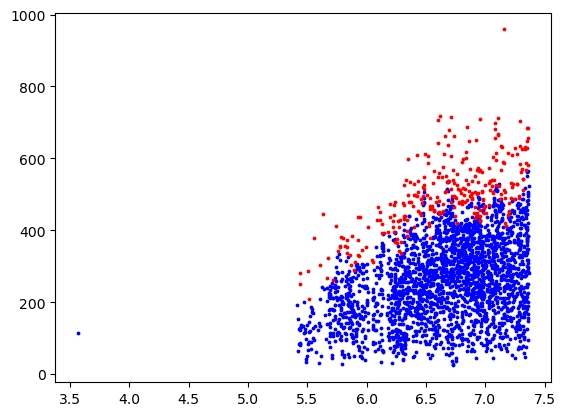

In [15]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [16]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

In [17]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))
quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

2520


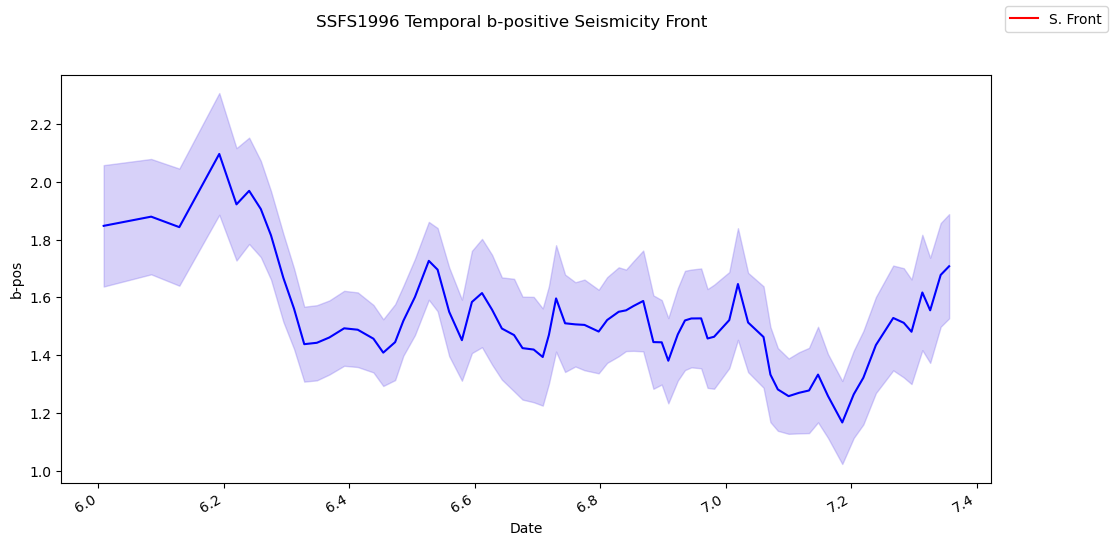

In [18]:


fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("SSFS1996 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
#fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

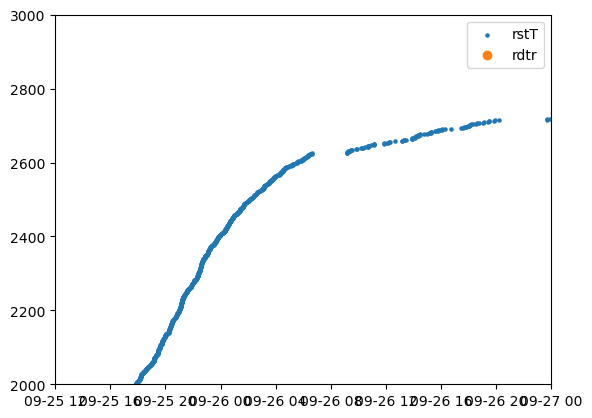

In [51]:
ind = list(range(len(rdtr)))
ind1 = list(range(len(rstT)))
plt.scatter(rstT,ind1,label='rstT',s=5)
plt.scatter(rdtr,ind,label='rdtr')
plt.ylim(2000,3000)
plt.xlim([datetime(1996,9,25,12),datetime(1996,9,27)])
plt.legend()
plt.show()

In [19]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.550559732588652 1.4544943928932514 1.6542744153481024 0.04885559253930901
1.5043623508484227 1.4020445271032904 1.6217412945541867 0.05666598505391487


1.550559732588652 1.4544943928932514 1.6542744153481024 0.04885559253930901
1.5043623508484227 1.4020445271032904 1.6217412945541867 0.05666598505391487

In [20]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.5894960806528124 1.3038573661036115 1.9436623715065309 0.16754515091221758
1.401108527761227 1.1430223157320945 1.7655387512067835 0.16802263405450224


1.5894960806528124 1.3038573661036115 1.9436623715065309 0.16754515091221758
1.401108527761227 1.1430223157320945 1.7655387512067835 0.16802263405450224

In [50]:
"""
90% bv
rst 1.6443402871890598 1.5861864107336638 1.7650335794721492 0.04751772651043618
perc 1.7584115768428121 1.479836612870936 2.2094013043979683 0.1853849772655617
bp
rst 1.6876669407714313 1.5799030682737245 1.8050638682290265 0.058519044204516465
perc 1.584587974511865 1.3338666309610954 1.929722664032549 0.1630022562168731
80% bv
rst 1.6131929852622278 1.5522349777648163 1.7437089700480453 0.04949430759753332
perc 1.873392846750578 1.6578670025751412 2.1807668793553736 0.13618033397006674
bp
rst 1.617687398314215 1.5118820889561841 1.7377050398824667 0.057016678472350805
perc 1.3965642075087827 1.1331354309950823 1.7684468782135576 0.1650234391766538

"""

#Newww
"""
90% bv
rst 1.5486350420929345 1.4826565258630566 1.674052775665868 0.049830111100166025
perc 1.6131044771610081 1.3103449359193575 1.9730542544312044 0.16764161570280195
bp
rst 1.5057144855344975 1.4031550655831282 1.6247828563685927 0.05694465376653518
perc 1.3965642075087827 1.1308822682751412 1.768188523564674 0.16207316764349144
80% bv
rst 1.6131929852622278 1.5522349777648163 1.7437089700480453 0.04949430759753332
perc 1.873392846750578 1.6578670025751412 2.1807668793553736 0.13618033397006674
bp
rst 1.617687398314215 1.5118820889561841 1.7377050398824667 0.057016678472350805
perc 1.7542588692345014 1.554647206274247 2.002272862520409 0.11871120789603919


"""

# 90th percentile:
# rst: 1.6443402871890591 1.5836684464531374 1.7717932563663592
# perc: 1.7584115768428121 1.4879498502571824 2.206853379741385
# 80th percentile:
# rst: 1.6131929852622278 1.5434827800024546 1.7425292956696619
# perc: 1.873392846750578 1.6550054202688385 2.2273482017613575

Me


In [31]:
print('me')

me


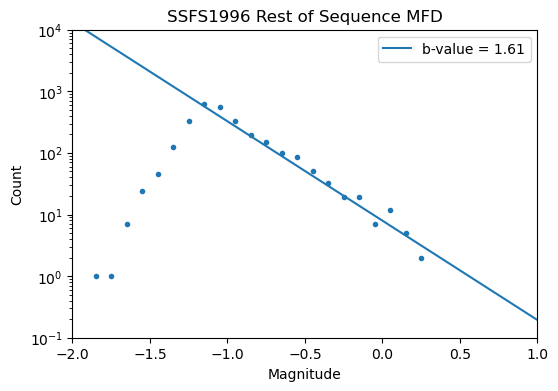

In [54]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS1996 Rest of Sequence MFD')
plt.show()

In [ ]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS1995 Seismicity Front MFD')
plt.show()